<a href="https://colab.research.google.com/github/WiratchawaKannika/DPDM65/blob/main/CleanData_Finalexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Import Data**

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/DPDM65/Final/train.csv')
print(Data.shape)  ##บอกขนาดของ DataFrame
Data.head()

(2725, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

- *Learning the dtypes of columns and how many non-null values are there in those columns*


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725 entries, 0 to 2724
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2725 non-null   int64  
 1   id                  2725 non-null   object 
 2   project_name        621 non-null    object 
 3   company             419 non-null    object 
 4   province            2723 non-null   object 
 5   district            2721 non-null   object 
 6   sub_district        2541 non-null   object 
 7   property_type       2725 non-null   object 
 8   home improvement    1606 non-null   object 
 9   renovate            1587 non-null   object 
 10  public utility      804 non-null    object 
 11  land type           310 non-null    object 
 12  land wide(m)        315 non-null    float64
 13  land long(m)        253 non-null    object 
 14  topsoil             510 non-null    object 
 15  corner              485 non-null    object 
 16  zip_co

- *Getting the statistical summary of dataset*

In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2725.0,1.362000e+03,7.867841e+02,0.0,681.0,1362.0,2043.0,2.724000e+03
land wide(m),315.0,5.545616e+01,7.558541e+01,4.0,12.0,27.5,65.0,4.200000e+02
zip_code,1741.0,4.635122e+06,1.355348e+08,40000.0,40000.0,40000.0,40130.0,4.000040e+09
number_of_rai,2725.0,3.561101e+00,1.590596e+01,0.0,0.0,0.0,0.0,4.580000e+02
number_of_va,2725.0,4.405461e+01,5.895673e+01,0.0,5.0,35.0,66.0,1.656000e+03
construct_year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- จะเห็นว่า Columns ที่ควรเป็นตัวเลข ประเภทยังคงเป็น Object อยู่ ไม่สามารถแสดงค่าทางสถิติได้ ต้องทำความสะอาดข้อมูลก่อน

### ทำความสะอาดตัวแปร `"sell_price"`

#### Check จำนวน Rows ที่มี Missing ใน Column `"sell_price"`

In [ ]:
 Data_null = Data[Data['sell_price'].isna()]
 sell_price_null  = Data_null.shape[0]/Data.shape[0]*100
 print(f'จำนวนที่ COlumn sell_price มี Missing คือ : {sell_price_null}%')

จำนวนที่ COlumn sell_price มี Missing คือ : 0.3302752293577982%


- จำนวนที่ COlumn sell_price มี Missing ไม่ถึง 10% ของจำนวนข้อมูลทั้งหมด จึงจะทำการลบ Rows ที่ไม่มีค่าใน Column `"sell_price"` ที่จะใช้สำหรับทำนายราคาที่อยู่อาศัย (y)

In [ ]:
Data_df = Data.dropna(subset=['sell_price']).reset_index(drop=True)
print(Data_df.shape)
Data_df.head()

(2716, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


- *ตรวจสอบว่าตัวแปร sell _price มีค่าที่ไม่ใช่ตัวเลขหรือไม่ ถ้าหากมีค่าอื่นจะทำการลบ recode นั้นออกไป*

In [ ]:
## Function check Float
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

Index, valu = [], []
#st = [',', '/', '-' ,'ุ']
num = ['1','2','3','4','5','6','7','8','9','0']
for i in range(len(Data_df)):
    sell_priice = Data_df['sell_price'][i]
    if isfloat(sell_priice) == False and sell_priice not in num:
        Index.append(i)
        valu.append(sell_priice)
        print(f'Recode ไม่ใช่ตัวเลข ไม่มี Number อยู่ด้วย ไม่สามารถแปลงเป็น Float ได้ -->> {sell_priice} ')

Recode ไม่ใช่ตัวเลข ไม่มี Number อยู่ด้วย ไม่สามารถแปลงเป็น Float ได้ -->> ไม่ระบุ (ถูกที่สุดในโครงการ) 


- ลบค่า `ไม่ระบุ (ถูกที่สุดในโครงการ)` ออกไปจากตัวแปร `sell_price`

In [ ]:
print(f'---- จำนวนแถวที่ไม่มีค่าเป็นตัวเลข----- จำนวน [{len(Index)}] แถว')
print('*'*50)
print(f' INDEX : {Index}')
print(valu)

---- จำนวนแถวที่ไม่มีค่าเป็นตัวเลข----- จำนวน [1] แถว
**************************************************
 INDEX : [214]
['ไม่ระบุ (ถูกที่สุดในโครงการ)']


In [ ]:
## Drop index = 214
Data_clean = Data_df.drop(214)
Data_clean = Data_clean.reset_index(drop=True)
print(Data_clean.shape)  ###index เปลี่ยนไปด้วย 
#Data_clean.head()

### ตรวจสอบค่า missing ในตัวแปร sell_price 
Data_clean.isnull().any()

(2715, 41)


Unnamed: 0            False
id                    False
project_name           True
company                True
province              False
district               True
sub_district           True
property_type         False
home improvement       True
renovate               True
public utility         True
land type              True
land wide(m)           True
land long(m)           True
topsoil                True
corner                 True
zip_code               True
zone                   True
alley                  True
street                 True
latitude               True
longitude              True
number_of_rai         False
number_of_ngan        False
number_of_va          False
construct_year         True
model                  True
sell_price            False
number_of_unit         True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
number_of_parking      True
usable_area            True
central_cost           True
direction           

- ตัวแปร `sell_price` ไม่มีค่าสูญหาย และไม่มีค่าที่ไใช่ตัวเลขแล้ว

In [ ]:
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2715 non-null   int64  
 1   id                  2715 non-null   object 
 2   project_name        620 non-null    object 
 3   company             418 non-null    object 
 4   province            2715 non-null   object 
 5   district            2713 non-null   object 
 6   sub_district        2534 non-null   object 
 7   property_type       2715 non-null   object 
 8   home improvement    1604 non-null   object 
 9   renovate            1585 non-null   object 
 10  public utility      800 non-null    object 
 11  land type           309 non-null    object 
 12  land wide(m)        314 non-null    float64
 13  land long(m)        252 non-null    object 
 14  topsoil             507 non-null    object 
 15  corner              485 non-null    object 
 16  zip_co

#### แทนค่า ค่าสูญหาย และ "ไม่ระบุ" ด้วย `0` ในตัวแปร ต่อไปนี้

```    
number_of_story     
number_of_bedroom   
number_of_bathroom  
number_of_parking   
central_cost  
parking_percentage
```



In [ ]:
dis_var = ['number_of_story', 'number_of_bedroom' ,'number_of_bathroom','number_of_parking' ,'central_cost', 'parking_percentage']
for d in dis_var:
    Data_clean[d] = Data_clean[d].fillna(float(0.0))

for d in dis_var:
    for i in range(len(Data_clean)) :
        if Data_clean[d][i] == 'ไม่ระบุ':
           Data_clean.loc[Data_clean.index[i], d] = float(0.0)

### Check NaN : 
Data_clean.isnull().any()

Unnamed: 0            False
id                    False
project_name           True
company                True
province              False
district               True
sub_district           True
property_type         False
home improvement       True
renovate               True
public utility         True
land type              True
land wide(m)           True
land long(m)           True
topsoil                True
corner                 True
zip_code               True
zone                   True
alley                  True
street                 True
latitude               True
longitude              True
number_of_rai         False
number_of_ngan        False
number_of_va          False
construct_year         True
model                  True
sell_price            False
number_of_unit         True
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
usable_area            True
central_cost          False
direction           

##### **✅Function: ตรวจสอบค่าที่ไม่ใช่ตัวเลข 0,1,2,...,9 ใน columns ที่ควรมีค่าเป็นตัวเลข**

In [ ]:
def checkOpera(var_num, train_clean):
    st = [',', '/', '-' ,'ุ']
    num = ['1','2','3','4','5','6','7','8','9','0']
    for v in dis_var:
        for i in range(len(Data_clean)):
            if isfloat(Data_clean[v][i]) == False :
              for s in st:
                  if s in train_clean[v][i]:
                      print(f'For Columns **--[ {v} ]')
                      print(Data_clean[v][i])
                      print(f'InDex {i}')
                      print('*'*100)
                      Data_clean.loc[Data_clean.index[i], v] = float(0.0)  
                  elif Data_clean[v][i] not in num:
                        Data_clean.loc[Data_clean.index[i], v] = float(0.0)

    return train_clean

In [ ]:
Data_clean_ = checkOpera(dis_var, Data_clean)
print(Data_clean_.shape)
Data_clean_.head()

(2715, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,0.0
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,0.0,0.0,NaN,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,0.0
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,0.0,0.0,208.0,0.0,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,0.0
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,0.0,0.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,0.0
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,0.0,0.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,0.0


In [ ]:
Data_clean_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2715 non-null   int64  
 1   id                  2715 non-null   object 
 2   project_name        620 non-null    object 
 3   company             418 non-null    object 
 4   province            2715 non-null   object 
 5   district            2713 non-null   object 
 6   sub_district        2534 non-null   object 
 7   property_type       2715 non-null   object 
 8   home improvement    1604 non-null   object 
 9   renovate            1585 non-null   object 
 10  public utility      800 non-null    object 
 11  land type           309 non-null    object 
 12  land wide(m)        314 non-null    float64
 13  land long(m)        252 non-null    object 
 14  topsoil             507 non-null    object 
 15  corner              485 non-null    object 
 16  zip_co

#### Selecting categorical features such as 

```    
property_type     
furniture
```



- ในตัวแปร furniture ถ้ามีการตกแต่งแทนค่าด้วย `"yes"` ถ้าไม่ระบุแทนค่าด้วย `"No"`

In [ ]:
Data_clean['furniture'] = Data_clean['furniture'].fillna('no')

for i in range(len(Data_clean_)) :
    if Data_clean_['furniture'][i] == 'ไม่ระบุ' :
        Data_clean_.loc[Data_clean_.index[i], 'furniture'] = 'no'
    else:
        Data_clean_.loc[Data_clean_.index[i], 'furniture'] = 'yes'
## Check
Data_clean_['furniture'].value_counts()

no     1563
yes    1152
Name: furniture, dtype: int64

- แทนค่า ประเภทที่อยู่อาศัยใหม่ให้เป็นภาษาอังกฤษ สำหรับ Columns

```
property_type
```

In [ ]:
def Eng_type(res_data):
    c = 'property_type'
    for i in range(len(res_data)):
        if res_data[c][i] == 'บ้านเดี่ยว':
            res_data[c][i] = 'House'
        elif res_data[c][i] == 'บ้านแฝด':
              res_data[c][i] = 'TwinHouse'
        elif res_data[c][i] == 'อาคารพาณิชย์/สำนักงาน':
              res_data[c][i] = 'Office'
        elif res_data[c][i] == 'คอนโด':
              res_data[c][i] = 'Condo'
        elif res_data[c][i] == 'ทาวน์โฮม':
              res_data[c][i] = 'TownHome'
        elif res_data[c][i] == 'ที่ดิน':
              res_data[c][i] = 'Land'
        
    print(res_data[c].value_counts())
    print('*'* 100)
    
    return res_data

In [ ]:
Data_clean_ = Eng_type(Data_clean_)
print(Data_clean_.shape)
## Check
Data_clean_['property_type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/loc

House        1194
Land          905
Office        227
TownHome      209
Condo         168
TwinHouse      12
Name: property_type, dtype: int64
****************************************************************************************************
(2715, 41)


House        1194
Land          905
Office        227
TownHome      209
Condo         168
TwinHouse      12
Name: property_type, dtype: int64

In [ ]:
Data_clean_.head().head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,0.0,NaN,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,0.0,0.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,0.0,0.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,0.0,0.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0


### แทนค่าสูญหายด้วยค่าเฉลี่ยของกลุ่มตามพื้นที่โครงการเป็นระดับ ตำบล อำเภอ จังหวัด ตามประเภทที่อยู่อาศัย

```
number_of_rai	
number_of_ngan	
number_of_va	
usable_area
```



##### **✅Function: ตรวจสอบ String ใน columns ที่ควรมีค่าเป็นตัวเลข และแทนค่าด้วย "unknow" เพื่อแทนค่าด้วย mean ของกลุ่มต่อไป**

---



In [ ]:
## Function check Float
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def checkOper_varcontinu(var_num, train_clean):
    st = [',', '/', '-' ,'ุ']
    num = ['1','2','3','4','5','6','7','8','9','0']
    for v in var_num:
        for i in range(len(train_clean)):
            if isfloat(train_clean[v][i]) == False :
              if v == 'sell_price':
                  train_clean = train_clean.drop(i)
              else:
                    for s in st:
                          if s in train_clean[v][i]:
                              print(f'For Columns **--[ {v} ]')
                              print(train_clean[v][i])
                              print(f'InDex {i}')
                              print('*'*100)
                              train_clean.loc[train_clean.index[i], v] = 'unknown'  
                          elif train_clean[v][i] not in num:
                                train_clean.loc[train_clean.index[i], v] = 'unknown'
    return train_clean

In [ ]:
var_num = ['number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area']
Data_clean_update = checkOpera(var_num, Data_clean_)
print(Data_clean_update.shape)
Data_clean_update.head()

(2715, 41)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,0.0,NaN,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,0.0,0.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,0.0,0.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,0.0,0.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0


##### ✅ **Function: สร้าง Column พื้นที่** 

In [ ]:
def G_area(df) :
    df_ = df.reset_index(drop=True)
    df_['G_area'] = '' 
    for i in range(len(df_)):
        if df_['district'][i] == 'unknown' and df_['sub_district'][i] == 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['province'][i]
        if df_['district'][i] != 'unknown' and df_['sub_district'][i] == 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['district'][i] + ',' + df_['province'][i]
        if df_['district'][i] == 'unknown' and df_['sub_district'][i] != 'unknown' :
            df_.loc[df_.index[i], 'G_area'] = df_['sub_district'][i] + ',' + df_['province'][i]
        elif df_['district'][i] != 'unknown' and df_['sub_district'][i] != 'unknown' :
              df_.loc[df_.index[i], 'G_area'] = df_['sub_district'][i] + ',' + df_['district'][i] + ',' + df_['province'][i]

    return df_

In [ ]:
for c in ['district', 'sub_district']:
    Data_clean_update[c] = Data_clean_update[c].fillna('unknown')

Data_clean_update = G_area(Data_clean_update)
print(Data_clean_update.shape)
Data_clean_update.head()

(2715, 42)


,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,G_area
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,no,no,...,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"ในเมือง,เมืองขอนแก่น,ขอนแก่น"
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,Land,NaN,NaN,...,0.0,NaN,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"ศิลา,เมืองขอนแก่น,ขอนแก่น"
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,House,NaN,NaN,...,0.0,208.0,0.0,NaN,yes,NaN,NaN,NaN,0.0,"ในเมือง,เมืองขอนแก่น,ขอนแก่น"
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,House,no,no,...,0.0,145.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0,"แดงใหญ่,เมืองขอนแก่น,ขอนแก่น"
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,House,no,no,...,0.0,114.0,0.0,ตะวันออกเฉียงใต้,no,NaN,NaN,NaN,0.0,"บ้านค้อ,เมืองขอนแก่น,ขอนแก่น"


#### ✅**Function: Calculate Mean of Group**

In [ ]:
import math

def cal_Gmean(df, list_columns): ## DataFrame, lost of columns that contain number. 
    lst_Garea = list(set(df['G_area']))
    mean_col_ = list()
    for v in list_columns:
        mean_col = list()
        df0 = df[df[v] != 'unknown']
        df0[[v]] = df0[[v]].astype(float)
        for g in lst_Garea:
            x = np.round(df0[df0['G_area'] == g][v].mean())
            if math.isnan(x) == True :
                mean_col.append((np.round(df0[v].mean())))
            else: 
                mean_col.append(np.round(df0[df0['G_area'] == g][v].mean()))
        mean_col_.append(mean_col)

    return lst_Garea, mean_col_

#### ✅**Function: แทนค่า Missing ด้วยค่าเฉลี่ยของที่ดินในแต่ละพื้นที่ประเทศไทย**

In [ ]:
def fillna_mean(land_, df_mean_land, lst_Garea, list_columns) : ## 1. list of Group area, 2. list of columns
    df_len, df_all = [], []
    for g in lst_Garea:
        mean_land = df_mean_land[df_mean_land['G_area'] == g]
        land_update = land_[land_['G_area'] == g]
        for c in list_columns:
            mean = mean_land[c].tolist()[0]
            land_update.fillna({c:mean}, inplace=True)
            # Applying the condition
            land_update[c].mask(land_update[c] == 'unknown', mean, inplace=True)
            df_len.append(land_update.shape[0])
        df_all.append(land_update)
    print('-'*200)
    ## Concat df     
    mean_land_update = pd.concat(df_all)
    mean_land_update = mean_land_update.reset_index(drop=True)
    print(mean_land_update.shape)
    #mean_land_update.head()

    return mean_land_update

#### ✅ **Function :แทนค่า Missing ด้วยค่าเฉลี่ยของกลุ่มในแต่ละปีะเภทที่อยู่อาศัยที่อยู่ในแต่พื้นที่**

In [ ]:
def FillNa_TableRes(resi_):
    df0_ = []
    list_columns = ['number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area']
    Set_resi_type = list(set(resi_['property_type']))
    print(Set_resi_type)
    #print(len(Set_resi_type))
    for k in range(len(Set_resi_type)):
        print(f'On Process -->>> property type [ {Set_resi_type[k]} ]')
        df0 = resi_[resi_['property_type'] == Set_resi_type[k]].reset_index(drop=True)
        lst_Garea, mean_col_ = cal_Gmean(df0, list_columns)
        df_mean_res = {'G_area':lst_Garea,'number_of_rai':mean_col_[0],'number_of_ngan':mean_col_[1], 'number_of_va': mean_col_[2], 'usable_area':mean_col_[3]}
        df_mean_res_ = pd.DataFrame(df_mean_res, columns=['G_area','number_of_rai',	'number_of_ngan',	'number_of_va',	'usable_area'])
        print(f'Table mean of property type [ {Set_resi_type[k]} Done !!] -->> {df_mean_res_.shape}')
        mean_res_update = fillna_mean(df0, df_mean_res_, lst_Garea, list_columns)
        print(f'Fillna missing Done  -->> Table Update -->> {mean_res_update.shape}')
        df0_.append(mean_res_update)
    ## Concat df     
    res_data = pd.concat(df0_)
    res_data = res_data.reset_index(drop=True)
    print(f'Concat Table Done !! -->> [ {res_data.shape} ] ')

    return res_data

In [ ]:
Data_train = FillNa_TableRes(Data_clean_update)
print(Data_train.shape)
Data_train.head()

['Office', 'House', 'TownHome', 'TwinHouse', 'Land', 'Condo']
On Process -->>> property type [ Office ]
Table mean of property type [ Office Done !!] -->> (27, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(227, 42)
Fillna missing Done  -->> Table Update -->> (227, 42)
On Process -->>> property type [ House ]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Table mean of property type [ House Done !!] -->> (131, 7)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(1194, 42)
Fillna missing Done  -->> Table Update -->> (1194, 42)
On Process -->>> property type [ TownHome ]
Table mean of property type [ TownHome Done !!] -->> (26, 7)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(209, 42)
Fillna missing Done  -->> Table Update -->> (209, 42)
On Process -->>> property type [ TwinHouse ]
Table mean of property type [ TwinHouse Done !!] -->> (6, 7)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage,G_area
0,217,17441.0,NaN,NaN,ขอนแก่น,พล,เมืองพล,Office,no,no,...,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"เมืองพล,พล,ขอนแก่น"
1,853,536.0,NaN,NaN,ขอนแก่น,พล,เมืองพล,Office,no,no,...,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"เมืองพล,พล,ขอนแก่น"
2,916,11.0,NaN,NaN,ขอนแก่น,พล,เมืองพล,Office,no,no,...,0.0,504.0,0.0,ไม่ระบุ,yes,NaN,NaN,NaN,0.0,"เมืองพล,พล,ขอนแก่น"
3,1098,18706.0,NaN,NaN,ขอนแก่น,พล,เมืองพล,Office,no,no,...,0.0,0.0,0.0,ไม่ระบุ,no,NaN,NaN,NaN,0.0,"เมืองพล,พล,ขอนแก่น"
4,365,20342P,NaN,NaN,ขอนแก่น,เขาสวนกวาง,เขาสวนกวาง,Office,no,no,...,0.0,136.0,0.0,NaN,yes,NaN,NaN,NaN,0.0,"เขาสวนกวาง,เขาสวนกวาง,ขอนแก่น"


### Selecting features



```
property_type
number_of_story     
number_of_bedroom   
number_of_bathroom  
number_of_parking   
central_cost  
parking_percentage
furniture
number_of_rai	
number_of_ngan	
number_of_va	
usable_area
sell_price
G_area
```



In [ ]:
dataset =  Data_train[['id', 'province',	'district',	'sub_district',	'property_type', 'number_of_story', 'number_of_bedroom' ,'number_of_bathroom', 'number_of_parking',   
                        'central_cost' ,'parking_percentage', 'furniture', 'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area','sell_price', 'G_area']]
print(dataset.shape)       
dataset.head()           

(2715, 18)


,id,province,district,sub_district,property_type,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,furniture,number_of_rai,number_of_ngan,number_of_va,usable_area,sell_price,G_area
0,17441.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,17.2,0.0,2100000.0,"เมืองพล,พล,ขอนแก่น"
1,536.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,17.8,0.0,2901000.0,"เมืองพล,พล,ขอนแก่น"
2,11.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,yes,0.0,0.0,50.6,504.0,17000000.0,"เมืองพล,พล,ขอนแก่น"
3,18706.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,38.7,0.0,3880000.0,"เมืองพล,พล,ขอนแก่น"
4,20342P,ขอนแก่น,เขาสวนกวาง,เขาสวนกวาง,Office,0.0,0.0,0.0,0.0,0.0,0.0,yes,2.0,2.0,96.0,136.0,30000000.0,"เขาสวนกวาง,เขาสวนกวาง,ขอนแก่น"


In [ ]:
dataset.isnull().any()

id                    False
province              False
district              False
sub_district          False
property_type         False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
number_of_parking     False
central_cost          False
parking_percentage    False
furniture             False
number_of_rai         False
number_of_ngan        False
number_of_va          False
usable_area           False
sell_price            False
G_area                False
dtype: bool

#### คำนวณพื้นที่อยู่อาศัย (หน่วย:ไร่)

- หน่วยวัดพื้นที่ดินของไทยใช้หน่วยไร่งานตารางวาตารางเมตรและวีธีการแปลงหน่วย · `1 ไร่ = 4 งาน = 400 ตารางวา = 1,600 ตารางเมตร`

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DPDM65/Final/MyDataSet_Finalexam.csv')

In [ ]:
dataset['area'] =  dataset['number_of_rai'] + dataset['number_of_rai']/4 + dataset['number_of_va']/100
print(dataset.shape)
dataset.head()

(2715, 20)


,Unnamed: 0,id,province,district,sub_district,property_type,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,furniture,number_of_rai,number_of_ngan,number_of_va,usable_area,sell_price,G_area,area
0,0,17441.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,17.2,0.0,2100000.0,"เมืองพล,พล,ขอนแก่น",0.172
1,1,536.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,17.8,0.0,2901000.0,"เมืองพล,พล,ขอนแก่น",0.178
2,2,11.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,yes,0.0,0.0,50.6,504.0,17000000.0,"เมืองพล,พล,ขอนแก่น",0.506
3,3,18706.0,ขอนแก่น,พล,เมืองพล,Office,0.0,0.0,0.0,0.0,0.0,0.0,no,0.0,0.0,38.7,0.0,3880000.0,"เมืองพล,พล,ขอนแก่น",0.387
4,4,20342P,ขอนแก่น,เขาสวนกวาง,เขาสวนกวาง,Office,0.0,0.0,0.0,0.0,0.0,0.0,yes,2.0,2.0,96.0,136.0,30000000.0,"เขาสวนกวาง,เขาสวนกวาง,ขอนแก่น",3.460


## Exploratory data analysis

In [ ]:
columns = ['number_of_story', 'number_of_bedroom' ,'number_of_bathroom', 'number_of_parking', 'central_cost' ,'parking_percentage', 
              'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area', 'area', 'sell_price']

for c in columns:
    dataset[c] = dataset[c].astype(float)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2715 entries, 0 to 2714
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2715 non-null   int64  
 1   id                  2715 non-null   object 
 2   province            2715 non-null   object 
 3   district            2715 non-null   object 
 4   sub_district        2715 non-null   object 
 5   property_type       2715 non-null   object 
 6   number_of_story     2715 non-null   float64
 7   number_of_bedroom   2715 non-null   float64
 8   number_of_bathroom  2715 non-null   float64
 9   number_of_parking   2715 non-null   float64
 10  central_cost        2715 non-null   float64
 11  parking_percentage  2715 non-null   float64
 12  furniture           2715 non-null   object 
 13  number_of_rai       2715 non-null   float64
 14  number_of_ngan      2715 non-null   float64
 15  number_of_va        2715 non-null   float64
 16  usable

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2715.0,1.357000e+03,7.838973e+02,0.0,678.5,1357.0,2035.500,2.714000e+03
number_of_story,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
number_of_bedroom,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
number_of_bathroom,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
number_of_parking,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
central_cost,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
parking_percentage,2715.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00
number_of_rai,2715.0,3.556906e+00,1.592035e+01,0.0,0.0,0.0,0.000,4.580000e+02
number_of_ngan,2715.0,6.961326e-01,4.368116e+00,0.0,0.0,0.0,1.000,1.450000e+02
number_of_va,2715.0,4.406770e+01,5.901012e+01,0.0,5.0,35.0,66.000,1.656000e+03


In [ ]:
MYdataset = dataset[columns]
print(MYdataset.shape)
MYdataset.head()

(2715, 12)


,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,number_of_rai,number_of_ngan,number_of_va,usable_area,area,sell_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.2,0.0,0.172,2100000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,0.0,0.178,2901000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.6,504.0,0.506,17000000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.7,0.0,0.387,3880000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,96.0,136.0,3.460,30000000.0


In [ ]:
# # rescale the features
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # apply scaler() to all the numeric columns 
# MYdataset[columns] = scaler.fit_transform(MYdataset[columns])
# MYdataset.head()

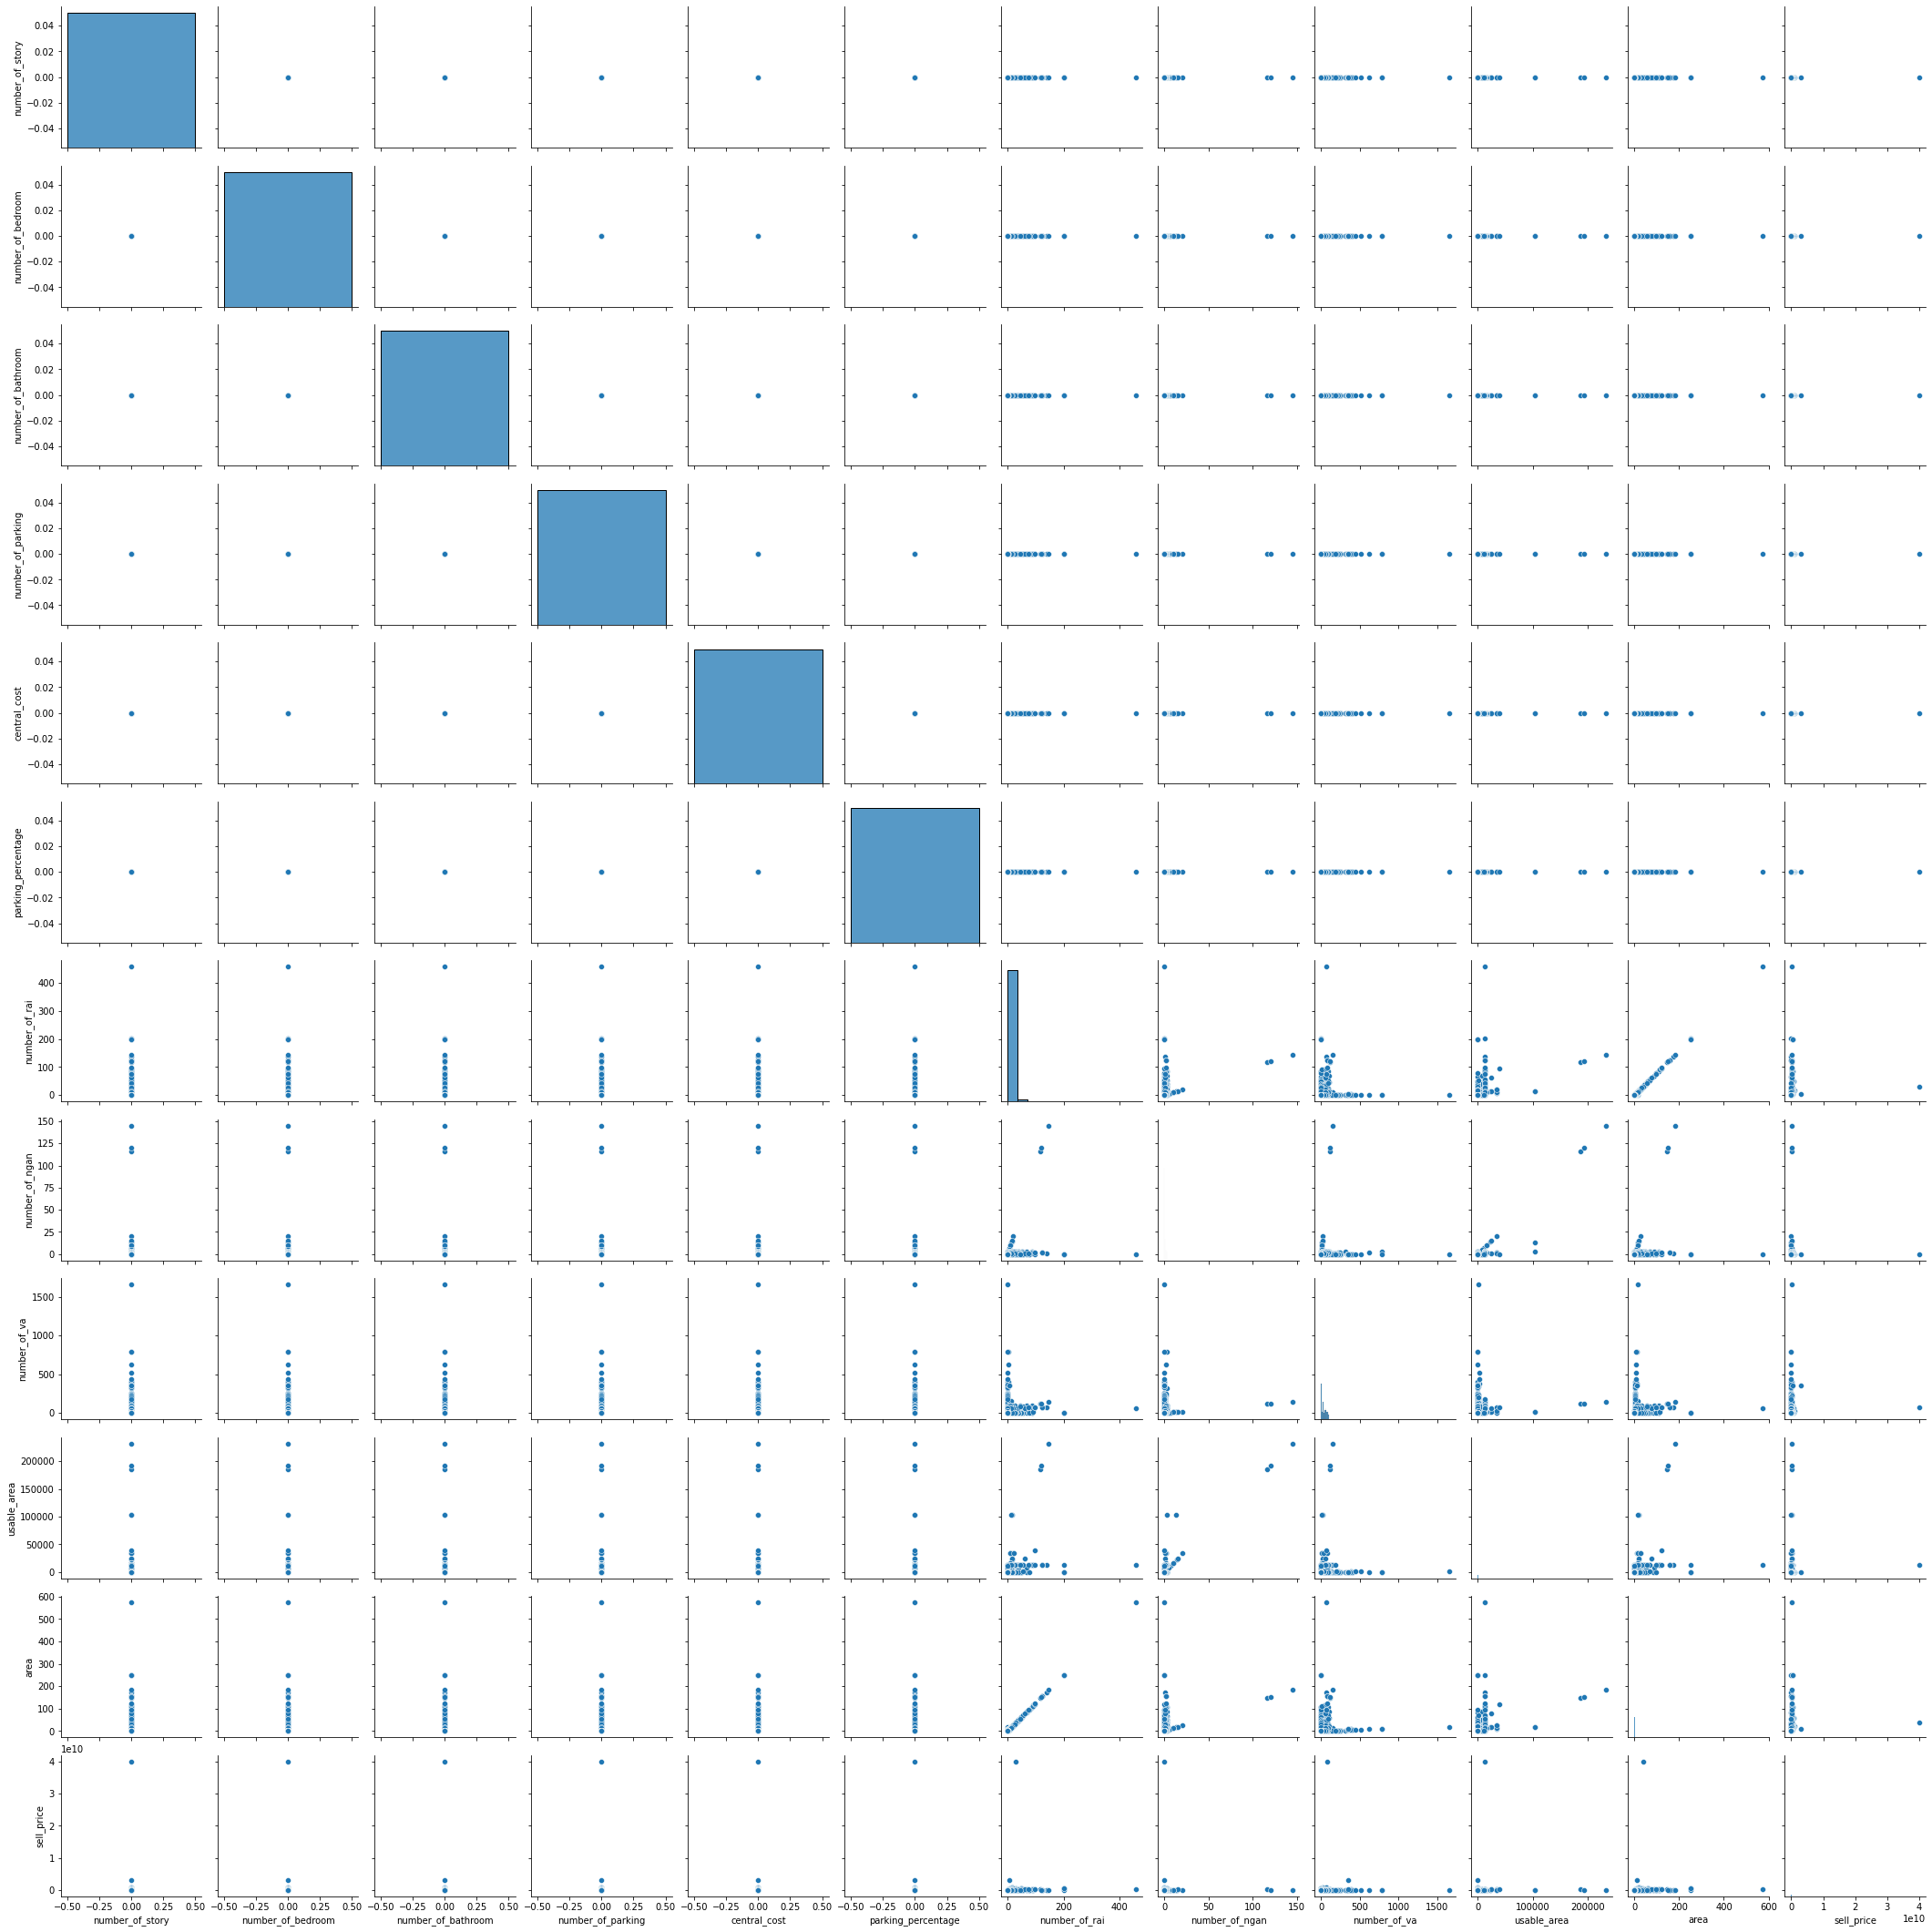

In [ ]:
import seaborn as sns

sns.pairplot(MYdataset)

In [ ]:
MYdataset.corr()

,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,central_cost,parking_percentage,number_of_rai,number_of_ngan,number_of_va,usable_area,area,sell_price
number_of_story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_bathroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
central_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parking_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_rai,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.280933,-0.019810,0.350613,0.999560,0.062969
number_of_ngan,NaN,NaN,NaN,NaN,NaN,NaN,0.280933,1.000000,0.043961,0.814476,0.282279,0.000799
number_of_va,NaN,NaN,NaN,NaN,NaN,NaN,-0.019810,0.043961,1.000000,0.009010,0.009844,0.016257
usable_area,NaN,NaN,NaN,NaN,NaN,NaN,0.350613,0.814476,0.009010,1.000000,0.350932,0.025062


In [ ]:
relation = MYdataset.corr()
relation_index = relation.index
relation_index

Index(['number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'number_of_parking', 'central_cost', 'parking_percentage',
       'number_of_rai', 'number_of_ngan', 'number_of_va', 'usable_area',
       'area', 'sell_price'],
      dtype='object')

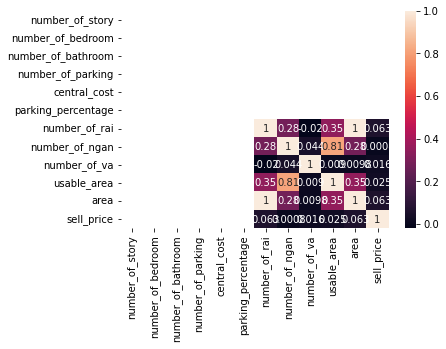

In [ ]:
sns.heatmap(MYdataset[relation_index].corr(),annot=True)

## **Selecting features**

#### *Selecting numerical features based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function.*

```
number_of_story	
number_of_bedroom	
number_of_bathroom	
number_of_parking	
central_cost	
parking_percentage	
usable_area	
area
```



#### *Selected the categorical values which I believe have significant effect on the target variable*


```
property_type
furniture
```






#### Target variable


```
sell_price
```

### Save Data set to CSV.

In [ ]:
dataset.to_csv('/content/drive/MyDrive/DPDM65/Final/MyDataSet_Finalexam.csv')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------